In [1]:
import pandas as pd
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("bank.txt",sep=";")

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.shape

(4521, 17)

In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
for col in ['job', 'marital','education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome','y']:

    data[col] = data[col].astype('category')

In [10]:
data.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y            category
dtype: object

In [11]:
data['target_var']=data['y']

In [12]:
data.rename(columns={'y':'taken_term'}, inplace=True)

In [13]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,taken_term,target_var
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,no


In [14]:
data=data.drop('taken_term',axis=1)

In [15]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target_var
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

data['target_var'] = encoder.fit_transform(data['target_var'])

In [17]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target_var
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [18]:
data.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
target_var    0
dtype: int64

In [19]:
data_c=data.select_dtypes(include=['category'])

In [20]:
data_c.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [21]:
data_c.head(30)

,job,marital,education,default,housing,loan,contact,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
5,management,single,tertiary,no,no,no,cellular,feb,failure
6,self-employed,married,tertiary,no,yes,no,cellular,may,other
7,technician,married,secondary,no,yes,no,cellular,may,unknown
8,entrepreneur,married,tertiary,no,yes,no,unknown,may,unknown
9,services,married,primary,no,yes,yes,cellular,apr,failure


In [22]:
categorical_Attributes = data.select_dtypes(include=['category']).columns
categorical_Attributes

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [23]:
data_n=data.select_dtypes(include=['int64'])

In [24]:
numerical_Attributes = data.select_dtypes(include=['int64']).columns
numerical_Attributes

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [25]:
num_attr=pd.DataFrame(data_n)

In [26]:
num_attr

,age,balance,day,duration,campaign,pdays,previous
0,30,1787,19,79,1,-1,0
1,33,4789,11,220,1,339,4
2,35,1350,16,185,1,330,1
3,30,1476,3,199,4,-1,0
4,59,0,5,226,1,-1,0
...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0
4517,57,-3313,9,153,1,-1,0
4518,57,295,19,151,11,-1,0
4519,28,1137,6,129,4,211,3


In [27]:
data = pd.get_dummies(columns=categorical_Attributes, data=data, prefix=categorical_Attributes, prefix_sep="_")
print (data.columns, data.shape)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'target_var', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object') (4521, 52)


In [28]:
data.head()

,age,balance,day,duration,campaign,pdays,previous,target_var,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [29]:
pd.value_counts(data['target_var'].values)

0    4000
1     521
dtype: int64

In [30]:
data['target_var'].value_counts(normalize=True)

0    0.88476
1    0.11524
Name: target_var, dtype: float64

In [31]:
#dl=pd.concat([data,num_attr])

In [32]:
#dl

In [33]:
data

,age,balance,day,duration,campaign,pdays,previous,target_var,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4519,28,1137,6,129,4,211,3,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [34]:
y=data['target_var']

X=data.drop('target_var',axis=1)
#dataframe


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=123)

In [35]:
print(pd.value_counts(y_train))
print(pd.value_counts(y_test))

0    2992
1     398
Name: target_var, dtype: int64
0    1008
1     123
Name: target_var, dtype: int64


#  DEFAULT DECISION TREE ALGORITHM

In [36]:
from sklearn.feature_selection import RFE

DT=tree.DecisionTreeClassifier(random_state=42)

rfe_DT=RFE(DT,n_features_to_select=20,verbose=21)

rfe_DT.fit(X_train,y_train)

names=X_train.columns.tolist()

b=rfe_DT.ranking_

#RFE: Recursive Feature Elimination is corresponding to Machine Learning Model.
#ranking is a attribute

a=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b,names))),columns=['rank','features'])

#a.to_csv('feature_selection.csv')

RFE_selected=a['features'][a['rank']==1]

RFE_selected

Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 fe

0                  age
1              balance
2             campaign
3     contact_cellular
4      contact_unknown
5                  day
6             duration
7      job_blue-collar
8       job_technician
9      marital_married
10           month_apr
11           month_aug
12           month_jun
13           month_mar
14           month_may
15           month_nov
16           month_oct
17               pdays
18    poutcome_success
19            previous
Name: features, dtype: object

In [37]:
X_train=X_train[RFE_selected]
X_test=X_test[RFE_selected]

In [38]:
X_test.shape,X_train.shape

((1131, 20), (3390, 20))

In [39]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
clf

DecisionTreeClassifier()

In [41]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [42]:
train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
test_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)

[[2992    0]
 [   0  398]]


In [45]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
print(confusion_matrix_test)

[[929  79]
 [ 65  58]]


In [46]:
confusion_matrix_train[0,0]

2992

In [47]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0


In [48]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9216269841269841
Test TPR:  0.4715447154471545
Test Accuracy:  0.8726790450928382


In [49]:
clf

DecisionTreeClassifier()

In [50]:
clf.feature_importances_

array([0.07339125, 0.14153818, 0.05077606, 0.01059843, 0.01552245,
       0.09470734, 0.30665582, 0.0108789 , 0.02289904, 0.01473765,
       0.0098453 , 0.01212588, 0.01944461, 0.01100886, 0.0125386 ,
       0.01105078, 0.02606395, 0.05316185, 0.08539169, 0.01766336])

# RANDOM FOREST ALGORITHM

In [51]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=42)

rfe_RF=RFE(RF,n_features_to_select=20,verbose=21)

rfe_RF.fit(X_train,y_train)
names1=X_train.columns.tolist()
b1=rfe_RF.ranking_


a1=pd.DataFrame(sorted(list(map(lambda x,y: (x,y),b1,names1))),columns=['rank','features'])


RFE_selected1=a1['features'][a1['rank']==1]

RFE_selected1









0                  age
1              balance
2             campaign
3     contact_cellular
4      contact_unknown
5                  day
6             duration
7      job_blue-collar
8       job_technician
9      marital_married
10           month_apr
11           month_aug
12           month_jun
13           month_mar
14           month_may
15           month_nov
16           month_oct
17               pdays
18    poutcome_success
19            previous
Name: features, dtype: object

In [52]:
X_train=X_train[RFE_selected]
X_test=X_test[RFE_selected]

# DEFAULT RANDOM FOREST

In [53]:
clf1 = RandomForestClassifier()
clf1.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
train_pred1 = clf1.predict(X_train)
test_pred1 = clf1.predict(X_test)

In [55]:
confusion_matrix_train = confusion_matrix(y_train, train_pred1)

print(confusion_matrix_train)

[[2992    0]
 [   0  398]]


In [56]:
confusion_matrix_test = confusion_matrix(y_test, test_pred1)
print(confusion_matrix_test)

[[981  27]
 [ 73  50]]


In [57]:
Accuracy_Train1=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train1= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train1= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train1)
print("Train TPR: ",TPR_Train1)
print("Train Accuracy: ",Accuracy_Train1)

Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0


In [58]:
Accuracy_Test1=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test1= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test1= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test1)
print("Test TPR: ",TPR_Test1)
print("Test Accuracy: ",Accuracy_Test1)

Test TNR:  0.9732142857142857
Test TPR:  0.4065040650406504
Test Accuracy:  0.9115826702033598


# HYPERPARAMETER TUNNING(TRAIL)

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators" : [90, 180,270],
              "max_depth" : [3,5,7],
              "max_features" : [0.4,0.5,0.6]
             }

RF_model=RandomForestClassifier() 
clf2 = GridSearchCV(RF_model, param_grid, cv=3)
clf2.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_features': [0.4, 0.5, 0.6],
                         'n_estimators': [90, 180, 270]})

In [60]:
clf2.best_estimator_

RandomForestClassifier(max_depth=7, max_features=0.5, n_estimators=90)

In [61]:
train_pred2 = clf2.predict(X_train)
test_pred2 = clf2.predict(X_test)

In [62]:
confusion_matrix_train = confusion_matrix(y_train, train_pred2)

print(confusion_matrix_train)



confusion_matrix_test = confusion_matrix(y_test, test_pred2)
print(confusion_matrix_test)

Accuracy_Train2=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train2= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train2= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train2)
print("Train TPR: ",TPR_Train2)
print("Train Accuracy: ",Accuracy_Train2)


Accuracy_Test2=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test2= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test2= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test2)
print("Test TPR: ",TPR_Test2)
print("Test Accuracy: ",Accuracy_Test2)

[[2979   13]
 [ 201  197]]
[[984  24]
 [ 75  48]]
Train TNR:  0.9956550802139037
Train TPR:  0.4949748743718593
Train Accuracy:  0.9368731563421829
Test TNR:  0.9761904761904762
Test TPR:  0.3902439024390244
Test Accuracy:  0.9124668435013262


# SELLECTING BEST RANGES FOR HYPERPARAMETERS

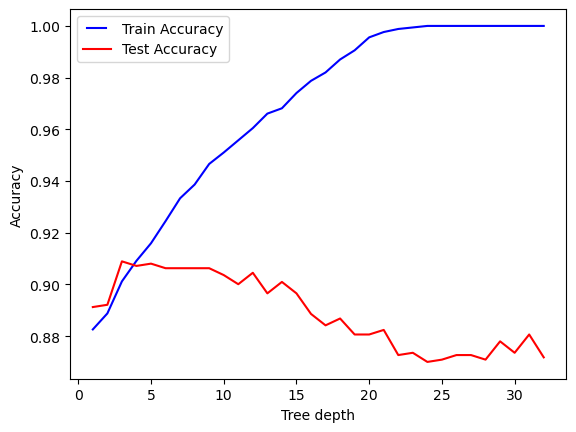

In [63]:
max_depths = np.linspace(1,32,32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

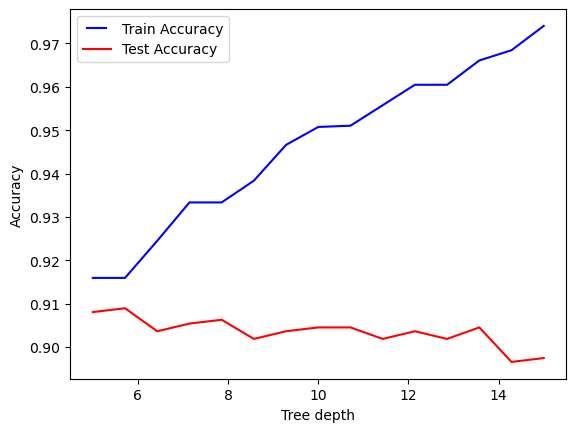

In [64]:
max_depths = np.linspace(5,15,15, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

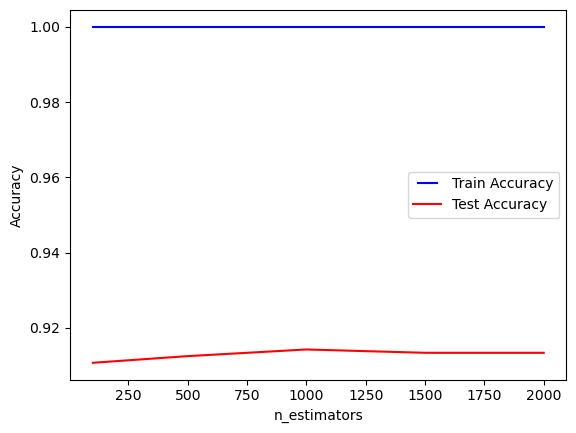

In [65]:
n_estimators = [100,500,1000,1500,2000]

train_results = []
test_results = []

for i in n_estimators:
    RF=RandomForestClassifier(n_estimators=i)
    RF.fit(X_train,y_train)
    train_pred = RF.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = RF.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results,'b', label='Train Accuracy')
line2, = plt.plot(n_estimators, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('n_estimators')
plt.show()

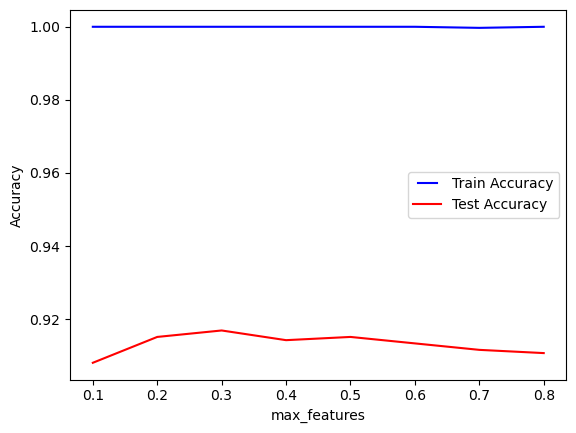

In [66]:
max_features = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]


train_results = []
test_results = []

for i in max_features:
    RF=RandomForestClassifier(max_features=i)
    RF.fit(X_train,y_train)
    train_pred = RF.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = RF.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_features, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('max_features')
plt.show()

In [67]:

#PERFORMING HYPERPARAMETER TUNNING
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators" : [500,1000,2000],
              "max_depth" : [5,6,7,8,9,10,11],
              "max_features" : [0.4,0.5,0.6]
             }

RF_model=RandomForestClassifier() 
clf3 = GridSearchCV(RF_model, param_grid, cv=3)
clf3.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11],
                         'max_features': [0.4, 0.5, 0.6],
                         'n_estimators': [500, 1000, 2000]})

In [68]:
clf3.best_estimator_

RandomForestClassifier(max_depth=9, max_features=0.4, n_estimators=2000)

In [69]:
train_pred3 = clf3.predict(X_train)
test_pred3 = clf3.predict(X_test)

In [70]:
confusion_matrix_train = confusion_matrix(y_train, train_pred3)

print(confusion_matrix_train)



confusion_matrix_test = confusion_matrix(y_test, test_pred3)
print(confusion_matrix_test)

Accuracy_Train3=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train3= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train3= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train3)
print("Train TPR: ",TPR_Train3)
print("Train Accuracy: ",Accuracy_Train3)


Accuracy_Test3=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test3= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test3= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall

print("Test TNR: ",TNR_Test3)
print("Test TPR: ",TPR_Test3)
print("Test Accuracy: ",Accuracy_Test3)

[[2991    1]
 [ 162  236]]
[[982  26]
 [ 71  52]]
Train TNR:  0.9996657754010695
Train TPR:  0.592964824120603
Train Accuracy:  0.9519174041297935
Test TNR:  0.9742063492063492
Test TPR:  0.42276422764227645
Test Accuracy:  0.9142351900972591


In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

    # predicted values

predicted = test_pred3

    # confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

    # calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')

Confusion matrix : 
 [[ 52  71]
 [ 26 982]]
Outcome values : 
 52 71 26 982
Classification report : 
               precision    recall  f1-score   support

           1       0.67      0.42      0.52       123
           0       0.93      0.97      0.95      1008

    accuracy                           0.91      1131
   macro avg       0.80      0.70      0.74      1131
weighted avg       0.90      0.91      0.91      1131

Accuracy : 91.4 %
Precision : 66.7 %
Recall : 42.3 %
F1 Score : 0.517
Specificity or True Negative Rate : 97.4 %
Balanced Accuracy : 69.8 %


In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual1 = y_train

    # predicted values

predicted1 = train_pred3

    # confusion matrix

matrix = confusion_matrix(actual1,predicted1, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual1,predicted1,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual1,predicted1,labels=[1,0])

print('Classification report : \n', C_Report)

    # calculating the metrics

sensitivity1 = round(tp/(tp+fn), 3);
specificity1 = round(tn/(tn+fp), 3);
accuracy1 = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy1 = round((sensitivity1+specificity1)/2, 3);
    
precision1 = round(tp/(tp+fp), 3);
f1Score1 = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy1*100, 2),'%')
print('Precision :', round(precision1*100, 2),'%')
print('Recall :', round(sensitivity1*100,2), '%')
print('F1 Score :', f1Score1)
print('Specificity or True Negative Rate :', round(specificity1*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy1*100, 2),'%')
    

Confusion matrix : 
 [[ 236  162]
 [   1 2991]]
Outcome values : 
 236 162 1 2991
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.59      0.74       398
           0       0.95      1.00      0.97      2992

    accuracy                           0.95      3390
   macro avg       0.97      0.80      0.86      3390
weighted avg       0.95      0.95      0.95      3390

Accuracy : 95.2 %
Precision : 99.6 %
Recall : 59.3 %
F1 Score : 0.743
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 79.6 %


In [73]:
confmatrxi_train={'accuracy values':accuracy1,'recall values':sensitivity1,'specificity values':specificity1,'precision':precision1,'F1score':f1Score1}

In [74]:
confmatrix_train_test=pd.DataFrame({'accuracy values':[accuracy1,accuracy],'recall values':[sensitivity1,sensitivity],'specificity values':[specificity1,specificity],'precision':[precision1,precision],'F1score':[f1Score1,f1Score]})

In [75]:
confmatrix_train_test

,accuracy values,recall values,specificity values,precision,F1score
0,0.952,0.593,1.000,0.996,0.743
1,0.914,0.423,0.974,0.667,0.517


In [76]:
confmatrxi_test={'accuracy values':accuracy,'recall values':sensitivity,'specificity values':specificity,'precision':precision,'F1score':f1Score}

In [77]:
confmatrxi_train

{'accuracy values': 0.952,
 'recall values': 0.593,
 'specificity values': 1.0,
 'precision': 0.996,
 'F1score': 0.743}

In [78]:
confmatrxi_test

{'accuracy values': 0.914,
 'recall values': 0.423,
 'specificity values': 0.974,
 'precision': 0.667,
 'F1score': 0.517}

In [79]:
clf3.predict_proba(X_test)

array([[0.74018978, 0.25981022],
       [0.52867705, 0.47132295],
       [0.84323924, 0.15676076],
       ...,
       [0.92893123, 0.07106877],
       [0.98099261, 0.01900739],
       [0.7785427 , 0.2214573 ]])

In [80]:
clf3.predict_proba(X_test)[:,1]

array([0.25981022, 0.47132295, 0.15676076, ..., 0.07106877, 0.01900739,
       0.2214573 ])

# ROC AUC CURVE

In [81]:
y_train_pred_final = pd.DataFrame({'targetvar':y_train.values, 'targetvar_Prob':clf3.predict_proba(X_train)[:,1]})
y_train_pred_final.head()

,targetvar,targetvar_Prob
0,0,0.004500
1,0,0.026448
2,0,0.022952
3,1,0.311715
4,0,0.083534


In [82]:
y_train_pred_final['predicted'] = y_train_pred_final.targetvar_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,targetvar,targetvar_Prob,predicted
0,0,0.004500,0
1,0,0.026448,0
2,0,0.022952,0
3,1,0.311715,0
4,0,0.083534,0


In [83]:
from sklearn import metrics
y_train_pred_final.head()
confusion = metrics.confusion_matrix(y_train_pred_final.targetvar, y_train_pred_final.predicted )
print(confusion)
print(metrics.accuracy_score(y_train_pred_final.targetvar, y_train_pred_final.predicted))

[[2991    1]
 [ 162  236]]
0.9519174041297935


In [84]:
print(metrics.accuracy_score(y_train_pred_final.targetvar, y_train_pred_final.predicted))
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
result_df={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}


0.9519174041297935


In [85]:
result_df

{'accuracy': 0.952,
 'recall': 0.593,
 'precision': 0.996,
 'FPR': 0.0,
 'specificity': 1.0}

In [86]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

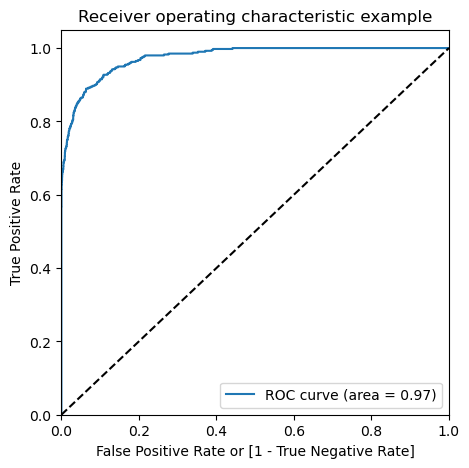

In [87]:
draw_roc(y_train_pred_final.targetvar, y_train_pred_final.targetvar_Prob)

In [88]:
X_test.shape
y_pred_final = pd.DataFrame({'target_var':y_test.values, 'target_var_Prob':clf2.predict_proba(X_test)[:,1]})
y_pred_final['ProdID'] = y_test.index
y_pred_final.head()

,target_var,target_var_Prob,ProdID
0,0,0.290236,2982
1,0,0.423467,276
2,0,0.143005,4132
3,0,0.358473,511
4,0,0.012365,2061


In [89]:
y_pred_final = y_pred_final.reindex(['ProdID','target_var','target_var_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,ProdID,target_var,target_var_Prob
0,2982,0,0.290236
1,276,0,0.423467
2,4132,0,0.143005
3,511,0,0.358473
4,2061,0,0.012365


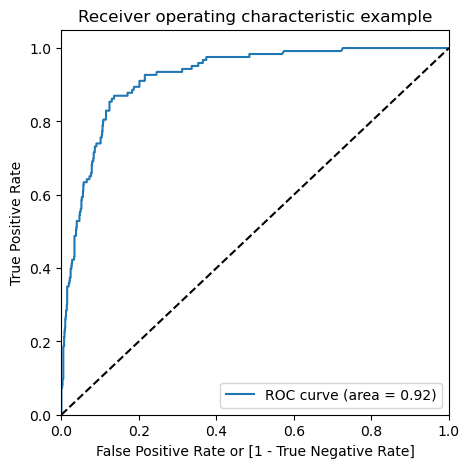

In [90]:
draw_roc(y_pred_final.target_var, y_pred_final.target_var_Prob)

In [91]:
y_pred_final.head()
y_pred_final['predicted'] = y_pred_final.target_var_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_final.head()

,ProdID,target_var,target_var_Prob,predicted
0,2982,0,0.290236,0
1,276,0,0.423467,0
2,4132,0,0.143005,0
3,511,0,0.358473,0
4,2061,0,0.012365,0


In [92]:
confusion1 = metrics.confusion_matrix(y_pred_final.target_var, y_pred_final.predicted )
confusion1

array([[984,  24],
       [ 75,  48]], dtype=int64)

In [93]:
metrics.accuracy_score(y_pred_final.target_var, y_pred_final.predicted)

0.9124668435013262

In [94]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

result_df_test={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

In [95]:
result_df_test

{'accuracy': 0.912,
 'recall': 0.39,
 'precision': 0.667,
 'FPR': 0.024,
 'specificity': 0.976}

In [96]:
result_df

{'accuracy': 0.952,
 'recall': 0.593,
 'precision': 0.996,
 'FPR': 0.0,
 'specificity': 1.0}

In [164]:
lr_results_df=pd.DataFrame({'train_default_threshold':[value[1] for key,value in enumerate( result_df.items())],'test_default_threshold':[value[1] for key,value in enumerate( result_df_test.items())]},index=[value[0] for key,value in enumerate( result_df.items())])

In [165]:
lr_results_df

,train_default_threshold,test_default_threshold
accuracy,0.952,0.912
recall,0.593,0.390
precision,0.996,0.667
FPR,0.000,0.024
specificity,1.000,0.976


In [99]:
y_pred_final

,ProdID,target_var,target_var_Prob,predicted
0,2982,0,0.290236,0
1,276,0,0.423467,0
2,4132,0,0.143005,0
3,511,0,0.358473,0
4,2061,0,0.012365,0
...,...,...,...,...
1126,2211,0,0.285566,0
1127,4059,0,0.022546,0
1128,2123,0,0.099100,0
1129,885,0,0.022899,0


In [100]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.target_var_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,ProdID,target_var,target_var_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,2982,0,0.290236,0,1,1,1,0,0,0,0,0,0,0
1,276,0,0.423467,0,1,1,1,1,1,0,0,0,0,0
2,4132,0,0.143005,0,1,1,0,0,0,0,0,0,0,0
3,511,0,0.358473,0,1,1,1,1,0,0,0,0,0,0
4,2061,0,0.012365,0,1,0,0,0,0,0,0,0,0,0


     threshold  accuracy     sensi     speci
0.0        0.0  0.108753  1.000000  0.000000
0.1        0.1  0.812555  0.894309  0.802579
0.2        0.2  0.881521  0.788618  0.892857
0.3        0.3  0.907162  0.609756  0.943452
0.4        0.4  0.913351  0.528455  0.960317
0.5        0.5  0.912467  0.390244  0.976190
0.6        0.6  0.908930  0.243902  0.990079
0.7        0.7  0.899204  0.113821  0.995040
0.8        0.8  0.898320  0.065041  1.000000
0.9        0.9  0.891247  0.000000  1.000000


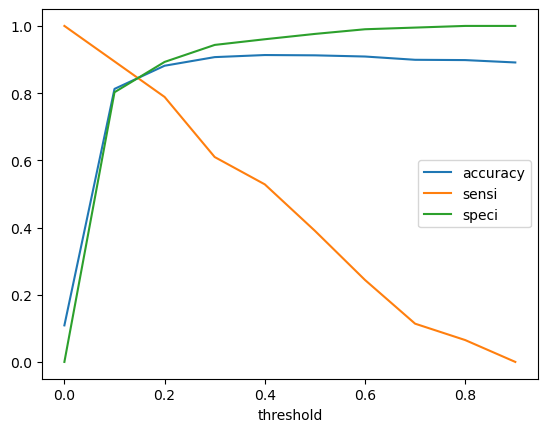

In [101]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['threshold','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_final.target_var, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='threshold', y=['accuracy','sensi','speci'])
plt.show()

In [102]:
y_train_pred_final['final_predicted'] = y_train_pred_final.targetvar_Prob.map( lambda x: 1 if x > 0.18 else 0)

y_train_pred_final.head()

,targetvar,targetvar_Prob,predicted,final_predicted
0,0,0.004500,0,0
1,0,0.026448,0,0
2,0,0.022952,0,0
3,1,0.311715,0,1
4,0,0.083534,0,0


In [103]:
confusion4 = metrics.confusion_matrix(y_train_pred_final.targetvar, y_train_pred_final.final_predicted )
confusion4

array([[2749,  243],
       [  41,  357]], dtype=int64)

In [104]:
result_df_train_threshold018={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

In [105]:
result_df_train_threshold018

{'accuracy': 0.912,
 'recall': 0.39,
 'precision': 0.667,
 'FPR': 0.024,
 'specificity': 0.976}

In [106]:
y_pred_final = pd.DataFrame({'target_var':y_test.values, 'target_var_Prob':clf3.predict_proba(X_test)[:,1]})
y_pred_final['ProdID'] = y_test.index
y_pred_final.head()

,target_var,target_var_Prob,ProdID
0,0,0.259810,2982
1,0,0.471323,276
2,0,0.156761,4132
3,0,0.372820,511
4,0,0.004734,2061


In [107]:
y_pred_final = y_pred_final.reindex(['ProdID','target_var','target_var_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,ProdID,target_var,target_var_Prob
0,2982,0,0.259810
1,276,0,0.471323
2,4132,0,0.156761
3,511,0,0.372820
4,2061,0,0.004734


In [108]:
y_pred_final['final_predicted'] = y_pred_final.target_var_Prob.map(lambda x: 1 if x > 0.18 else 0)

In [109]:
y_pred_final.head()

,ProdID,target_var,target_var_Prob,final_predicted
0,2982,0,0.259810,1
1,276,0,0.471323,1
2,4132,0,0.156761,0
3,511,0,0.372820,1
4,2061,0,0.004734,0


In [110]:
metrics.accuracy_score(y_pred_final.target_var, y_pred_final.final_predicted)
confusion5 = metrics.confusion_matrix(y_pred_final.target_var, y_pred_final.final_predicted )
confusion5

array([[885, 123],
       [ 22, 101]], dtype=int64)

In [111]:
TP = confusion5[1,1] # true positive 
TN = confusion5[0,0] # true negatives
FP = confusion5[0,1] # false positives
FN = confusion5[1,0] # false negatives

In [112]:
result_df_test_threshold018={'accuracy':round((TP+TN) / float(TN+FP+TP+FN),3),'recall':round((TP) / float(TP+FN),3),'precision':round((TP) / float(TP+FP),3),'FPR':round((FP) / float(TN+FP),3),'specificity':round((TN) / float(TN+FP),3)}

In [113]:
result_df_test_threshold018

{'accuracy': 0.872,
 'recall': 0.821,
 'precision': 0.451,
 'FPR': 0.122,
 'specificity': 0.878}

In [114]:
result_df_train_threshold018

{'accuracy': 0.912,
 'recall': 0.39,
 'precision': 0.667,
 'FPR': 0.024,
 'specificity': 0.976}

# GBM ALGORITHM

In [115]:
pip install xgboost


     ---------------------------------------- 89.1/89.1 MB 1.2 MB/s eta 0:00:00


In [122]:
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)
GBM_model.fit(X=X_train, y=y_train)
# %time GBM_model.fit(X=X_train, y=y_train)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=50, subsample=0.8)

In [123]:
y_pred_train = GBM_model.predict(X_train)
y_pred_test = GBM_model.predict(X_test)

In [124]:
importances = GBM_model.feature_importances_
indices1 = np.argsort(importances)[::-1]
print(indices1)
pd.DataFrame([X_train.columns[indices1],np.sort(importances)[::-1]])

[ 6 18  0 17  1  5 16  4 13 19 12  2 10 11 15  9 14  7  3  8]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,duration,poutcome_success,age,pdays,balance,day,month_oct,contact_unknown,month_mar,previous,month_jun,campaign,month_apr,month_aug,month_nov,marital_married,month_may,job_blue-collar,contact_cellular,job_technician
1,0.392431,0.10082,0.08263,0.064463,0.058877,0.056343,0.053868,0.032286,0.023694,0.023182,0.021426,0.020778,0.015062,0.014387,0.014008,0.01241,0.00717,0.004066,0.002058,0.000044


In [125]:
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred_train))

print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

Accuracy for Train set:
0.940117994100295
Accuracy for Test set:
0.9098143236074271


In [126]:
# Model in use
GBM = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = {"n_estimators" : [100,150],
              "max_depth" : [5, 10],
              "learning_rate" : [0.1,0.2]
             } 

In [128]:
CV_GBM = GridSearchCV(estimator=GBM, param_grid=param_grid, cv=5)
CV_GBM.fit(X=X_train, y=y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 10],
                         'n_estimators': [100, 150]})

In [129]:
best_gbm_model = CV_GBM.best_estimator_
print(CV_GBM.best_score_, CV_GBM.best_params_)

0.8976401179941004 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 150}


In [130]:
y_pred_train=best_gbm_model.predict(X_train)
y_pred_test=best_gbm_model.predict(X_test)

In [131]:
print(accuracy_score(y_train,y_pred_train))

1.0


In [132]:
print(accuracy_score(y_test,y_pred_test))

0.9106984969053935


In [166]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
confusion_matrix_train = confusion_matrix(y_train, y_pred_train)
print("TRAIN_Confussion matrix:")
print(confusion_matrix_train)
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print("TEST_confussion matrix:")
print(confusion_matrix_test)

TRAIN_Confussion matrix:
[[2952   40]
 [ 231  167]]
TEST_confussion matrix:
[[986  22]
 [ 82  41]]


In [167]:
#Calculate Accuracy, True Positive Rate and True Negative Rates for train data
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
Train_Specificity= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
Train_Recall= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
Train_Precision=confusion_matrix_train[1,1]/(confusion_matrix_train[0,1]+confusion_matrix_train[1,1])
Train_FPR=confusion_matrix_train[0,1]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
print("Accuracy: ",Accuracy_Train)
print("Specificity: ",Train_Specificity)
print("Recall: ",Train_Recall)
print("Precision: ",Train_Precision)
print("Train_FPR: ",Train_FPR)

Accuracy:  0.9200589970501475
Specificity:  0.9866310160427807
Recall:  0.41959798994974873
Precision:  0.8067632850241546
Train_FPR:  0.013368983957219251


In [168]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
Test_Specificity= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
Test_Recall= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1]) #Recall
Test_Precision=confusion_matrix_test[1,1]/(confusion_matrix_test[0,1] +confusion_matrix_test[1,1])
Test_FPR=confusion_matrix_test[0,1]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
print("Accuracy: ",Accuracy_Test)
print("Specificity: ",Test_Specificity)
print("Recall: ",Test_Recall)
print("Precision: ",Test_Precision)
print("Test_FPR: ",Test_FPR)

Accuracy:  0.9080459770114943
Specificity:  0.9781746031746031
Recall:  0.3333333333333333
Precision:  0.6507936507936508
Test_FPR:  0.021825396825396824


# XGB CLASSIFIER

In [134]:
XGB_model = XGBClassifier(n_estimators=500, 
                          gamma=0.5,
                          learning_rate=0.1)
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [135]:
y_pred_train = XGB_model.predict(X_train)
y_pred_test = XGB_model.predict(X_test)

In [136]:
importances = XGB_model.feature_importances_
indices1 = np.argsort(importances)[::-1]
print(indices1)
pd.DataFrame([X_train.columns[indices1],np.sort(importances)[::-1]])

[18 12  4 16  6 13 15 10  7 14  9 17  3 19  5  0  1  2 11  8]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,poutcome_success,month_jun,contact_unknown,month_oct,duration,month_mar,month_nov,month_apr,job_blue-collar,month_may,marital_married,pdays,contact_cellular,previous,day,age,balance,campaign,month_aug,job_technician
1,0.193036,0.08192,0.080858,0.06562,0.063111,0.059413,0.041159,0.04067,0.037455,0.037338,0.036876,0.035397,0.034281,0.032007,0.030239,0.02936,0.026823,0.025582,0.024934,0.023922


In [137]:
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred_train))

print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

Accuracy for Train set:
0.9920353982300885
Accuracy for Test set:
0.9115826702033598


In [138]:
XGB = XGBClassifier(n_jobs=-1)
 
# Use a grid over parameters of interest
param_grid = {'colsample_bytree': np.linspace(0.5, 0.9, 2),
              'n_estimators':[100],
              'max_depth': [10, 15]
             } 

In [139]:
CV_XGB = GridSearchCV(estimator=XGB, param_grid=param_grid, cv= 10)
CV_XGB.fit(X = X_train, y=y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     ma

In [140]:
best_xgb_model = CV_XGB.best_estimator_
print(CV_XGB.best_score_, CV_XGB.best_params_)

0.8979351032448377 {'colsample_bytree': 0.5, 'max_depth': 10, 'n_estimators': 100}


In [141]:
y_pred_train=best_xgb_model.predict(X_train)
y_pred_test=best_xgb_model.predict(X_test)

In [142]:
print(accuracy_score(y_train,y_pred_train))

1.0


In [143]:
print(accuracy_score(y_test,y_pred_test))

0.9098143236074271


# AdaBoost Classifier

In [144]:
from sklearn.tree import DecisionTreeClassifier

# Create adaboost-decision tree classifer object
Adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                    n_estimators = 600,
                                    learning_rate = 1)

Adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=1, n_estimators=600)

In [145]:
y_pred_train = Adaboost_model.predict(X_train)
y_pred_test = Adaboost_model.predict(X_test)

In [146]:
importances = Adaboost_model.feature_importances_
indices1 = np.argsort(importances)[::-1]
print(indices1)
pd.DataFrame([X_train.columns[indices1],np.sort(importances)[::-1]])

[ 6  1  0  5 17  2 19 15 10 14 16  9  7  3 12  4 18 13 11  8]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,duration,balance,age,day,pdays,campaign,previous,month_nov,month_apr,month_may,month_oct,marital_married,job_blue-collar,contact_cellular,month_jun,contact_unknown,poutcome_success,month_mar,month_aug,job_technician
1,0.253145,0.250727,0.115065,0.097336,0.06506,0.045267,0.027816,0.016285,0.014669,0.014006,0.013416,0.012896,0.012045,0.011334,0.009075,0.008946,0.00878,0.008529,0.0081,0.007503


In [147]:
print("Accuracy for Train set:")
print(accuracy_score(y_train,y_pred_train))

print("Accuracy for Test set:")
print(accuracy_score(y_test,y_pred_test))

Accuracy for Train set:
1.0
Accuracy for Test set:
0.8930150309460654


In [148]:
ADB = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2))
 
# Use a grid over parameters of interest
param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]
             } 

In [149]:
CV_ADB = GridSearchCV(estimator=ADB, 
                      param_grid=param_grid, 
                      cv=5,
                      n_jobs=-1
                     )

CV_ADB.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.9],
                         'n_estimators': [100, 150, 200]})

In [150]:
best_adb_model = CV_ADB.best_estimator_
print(CV_ADB.best_score_, CV_ADB.best_params_)

0.8967551622418879 {'learning_rate': 0.1, 'n_estimators': 150}


In [151]:
y_pred_train=best_adb_model.predict(X_train)
y_pred_test=best_adb_model.predict(X_test)

In [152]:
print(accuracy_score(y_train,y_pred_train))

0.9200589970501475


In [153]:
print(accuracy_score(y_test,y_pred_test))

0.9080459770114943
